# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [87]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [88]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [90]:
# Write your code here
#dataframe's shape method provides array of rows and columns [rows, columns)]
num_rows, num_cols = df.shape
print("Number of Rows :", num_rows)
print("Number of Columns :", num_cols)

Number of Rows : 1898
Number of Columns : 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [91]:
# Use info() to print a concise summary of the DataFrame
# Data frame's info method provides data type information along with column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [92]:
missing_values = df.isnull().sum()
if missing_values.any():
    print("Missing Values found in the Data")
    # Now correct the missing values by dropping the rows
    df.dropna(inplace=True)
else:
    print("No missing values found in the Data")

print("Missing Values corrected in the Data, number of missing values after correction:")
print(df.isnull().sum().to_string(header=True))

No missing values found in the Data
Missing Values corrected in the Data, number of missing values after correction:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [93]:
# Write your code here
# Calculate minimum, average, and maximum time for food preparation
min_prep_time = df['food_preparation_time'].min()
average_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()

print("\nMinimum time it takes for food to be prepared:", min_prep_time)
print("Average time it takes for food to be prepared:", average_prep_time)
print("Maximum time it takes for food to be prepared:", max_prep_time)


Minimum time it takes for food to be prepared: 20
Average time it takes for food to be prepared: 27.371970495258168
Maximum time it takes for food to be prepared: 35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [94]:
# Write the code here
df['rating'].unique()
no_rating = (df['rating'] == 'Not given').sum()
print("\nOrders with No Rating:", no_rating)


Orders with No Rating: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

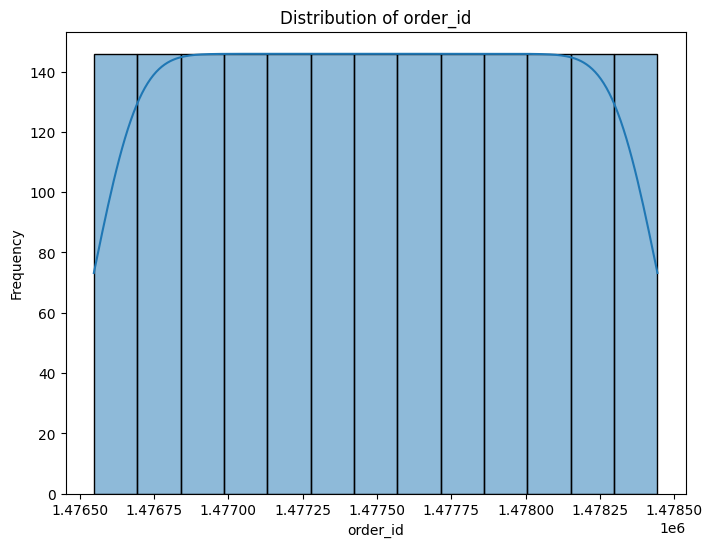

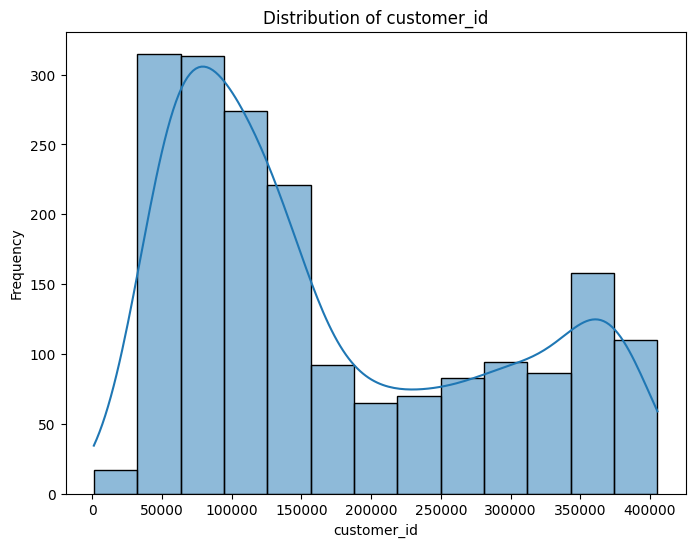

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


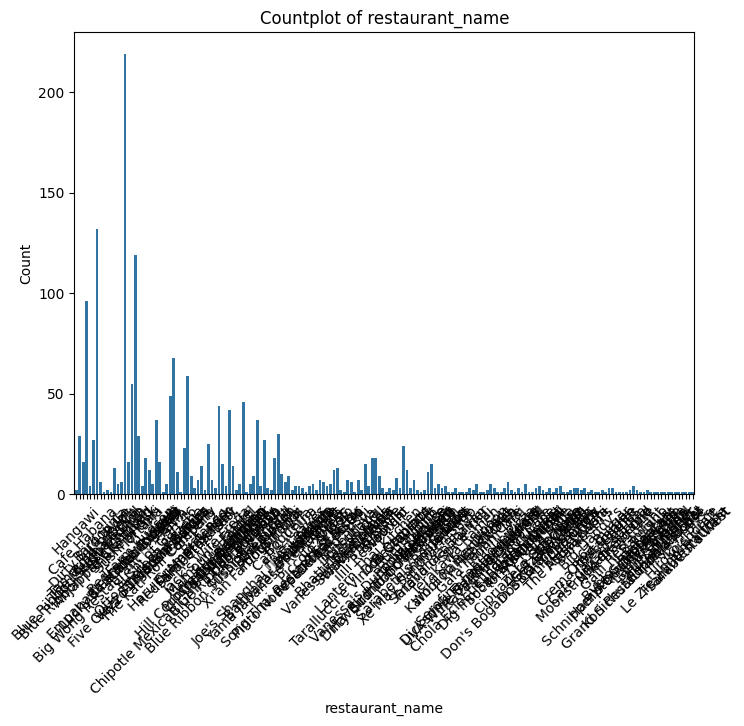

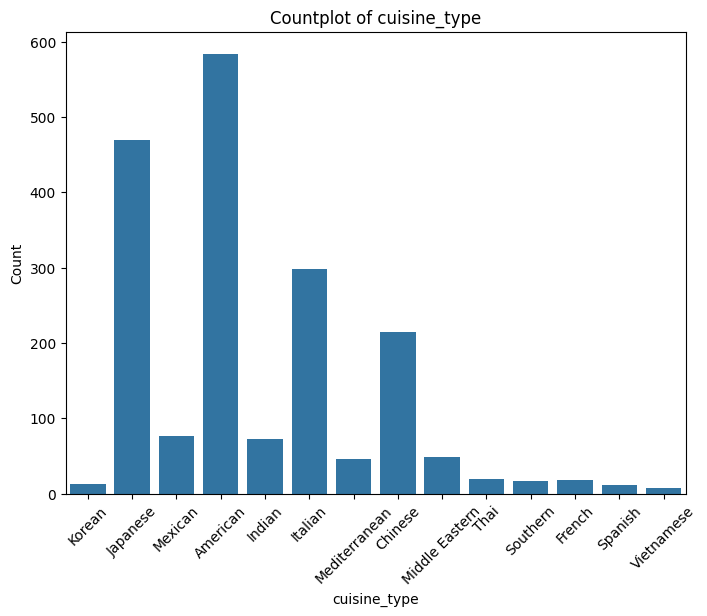

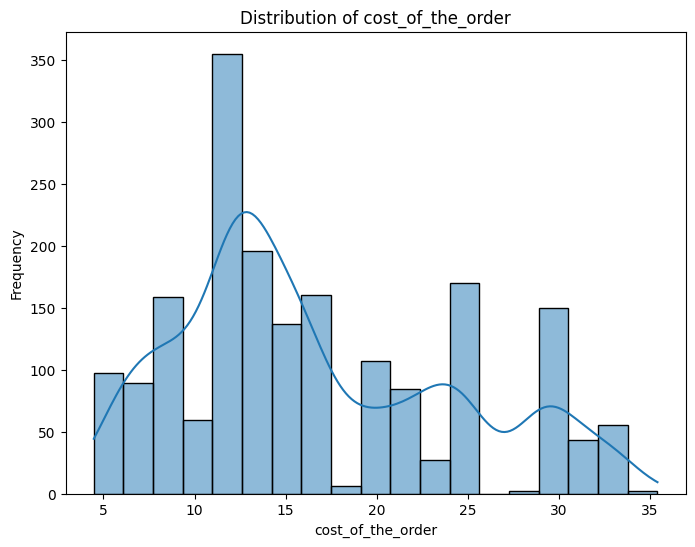

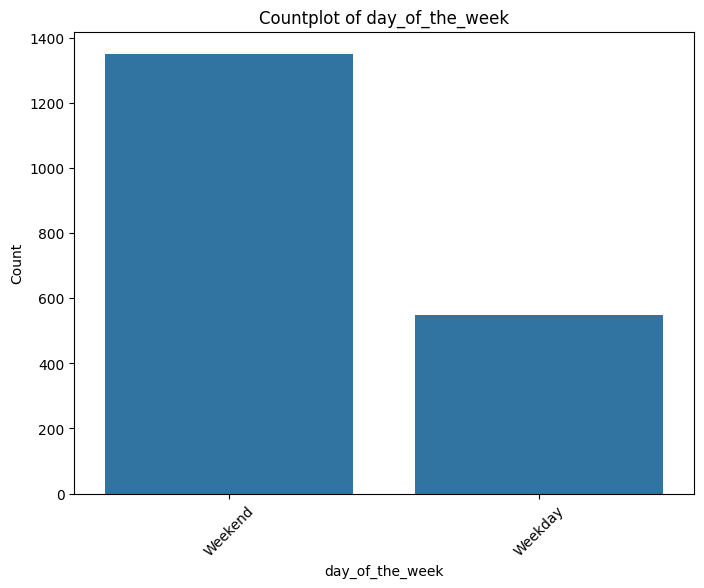

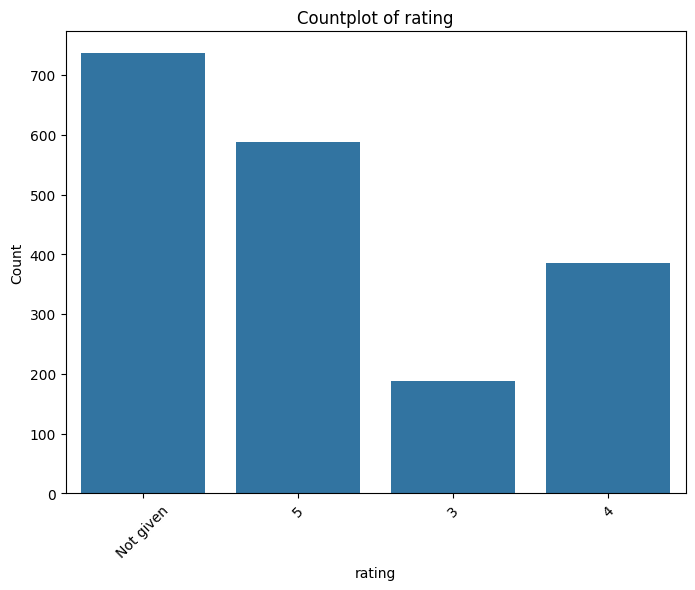

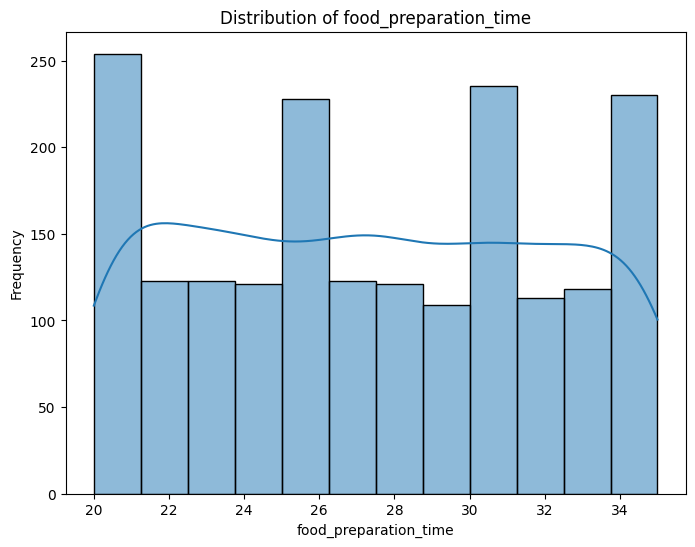

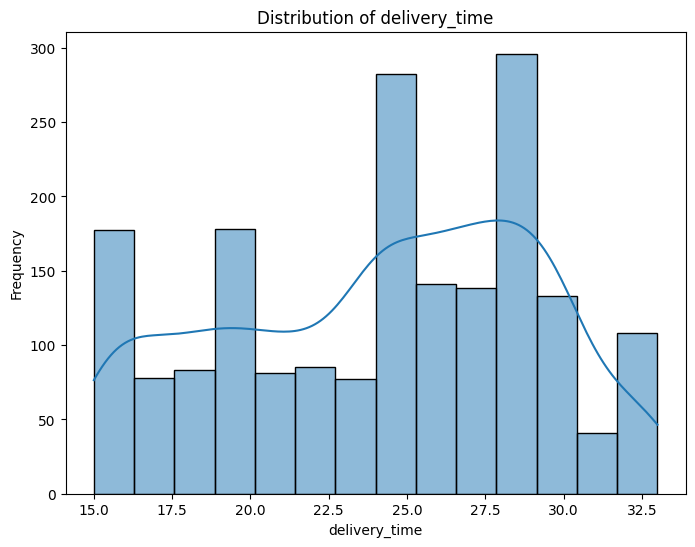

In [95]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for column in df.columns:
    # Plot distribution for numerical variables
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    # Plot countplot for categorical variables
    elif df[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column)
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

"""
Order ID: This should have a uniform distribution.

Customer ID: Similar to Order ID, has a uniform distribution .

Restaurant Name: This plot will show the count of orders from each restaurant. Some restaurants might be more popular than others.

Cuisine Type: This plot will show the distribution of different cuisine types ordered. Some cuisine types might be more popular than others.

Cost: This plot will show the distribution of costs for orders. It might be right-skewed if there are some high-cost orders.

Day of the Week: This plot will show the distribution of orders placed on weekdays vs. weekends. You can observe if there's any variation in order frequency between weekdays and weekends.

Rating: This plot will show the distribution of ratings given by customers. It should ideally be a symmetric distribution around the mean rating.

Food Preparation Time: This plot will show the distribution of time taken by restaurants to prepare food. It might be right-skewed if there are some orders that took significantly longer to prepare.

Delivery Time: This plot will show the distribution of delivery times. It might also be right-skewed if there are some orders that took longer to deliver.
"""

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [96]:
# Write the code here
# Calculate count of orders for each restaurant
grouped_custom_aggregation = df.groupby('restaurant_name').agg({'order_id': 'count'})

# Find the restaurant with the maximum number of orders
restaurant_with_max_orders = grouped_custom_aggregation['order_id'].idxmax()

# Print the restaurant name and the count of orders for that restaurant
print("Restaurant with the maximum number of orders:")
print("Restaurant Name:", restaurant_with_max_orders)
print("Count of Orders:", grouped_custom_aggregation.loc[restaurant_with_max_orders])


Restaurant with the maximum number of orders:
Restaurant Name: Shake Shack
Count of Orders: order_id    219
Name: Shake Shack, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [102]:
# Write the code here

grouped_custom_aggregation = df.groupby(['cuisine_type', 'day_of_the_week']).filter(lambda x: (x['day_of_the_week'] == 'Weekend').any()).groupby(['cuisine_type', 'day_of_the_week']).agg({'order_id': 'count'})

# Find the cuisine with the maximum number of orders
restaurant_with_max_orders = grouped_custom_aggregation['order_id'].idxmax()

# Print the restaurant name and the count of orders for that restaurant
print("Cuisine that is Popular over weekends:")
print("Cuisine:", restaurant_with_max_orders)
print("Count of Orders:", grouped_custom_aggregation.loc[restaurant_with_max_orders])





Cuisine that is Popular over weekends:
Cuisine: ('American', 'Weekend')
Count of Orders: order_id    415
Name: (American, Weekend), dtype: int64


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [99]:
# Write the code here
df.columns
# Filter the orders with cost greater than 20 dollars
expensive_orders = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of expensive orders
percentage_expensive_orders = (len(expensive_orders) / len(df)) * 100

print(f"The percentage of orders that cost more than $20 is: {percentage_expensive_orders:.2f}%")

The percentage of orders that cost more than $20 is: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [100]:
# Write the code here
# Mean order delivery time
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [101]:
# Write the code here
# Find the Top 3 customers with Maximum number of Orders
grouped_custom_aggregation = df.groupby(['customer_id']).agg({'order_id': 'count'}).sort_values(by='order_id',ascending=False)
print("Top 3 most frequent customers and their order counts:")
print(grouped_custom_aggregation.head(3))


Top 3 most frequent customers and their order counts:
             order_id
customer_id          
52832              13
47440              10
83287               9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


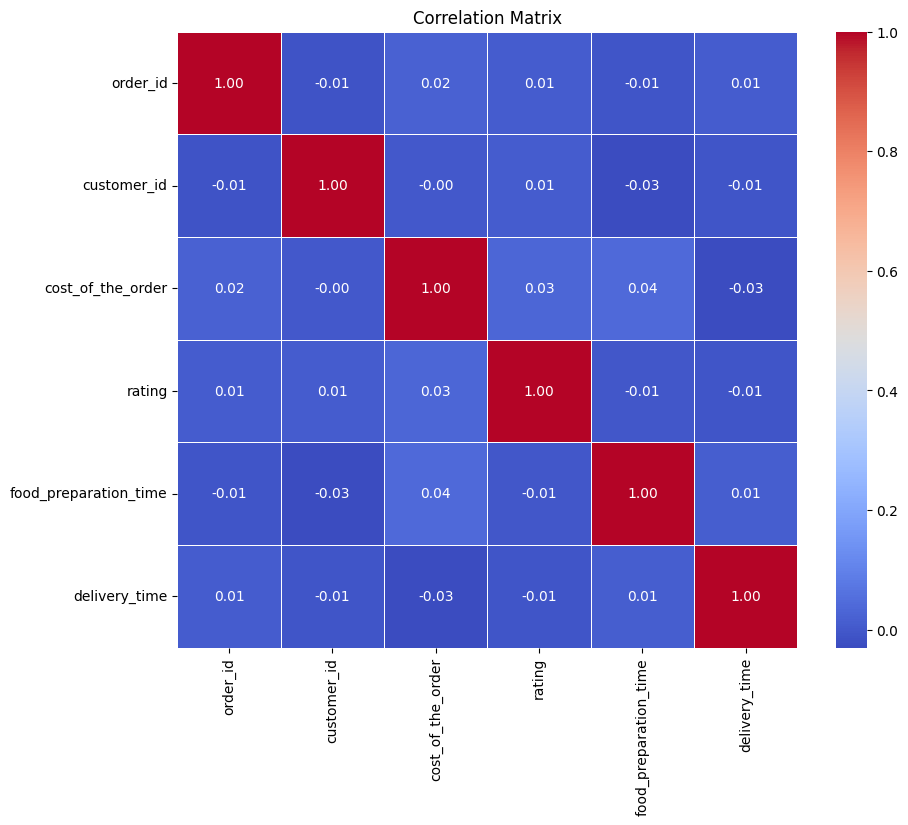

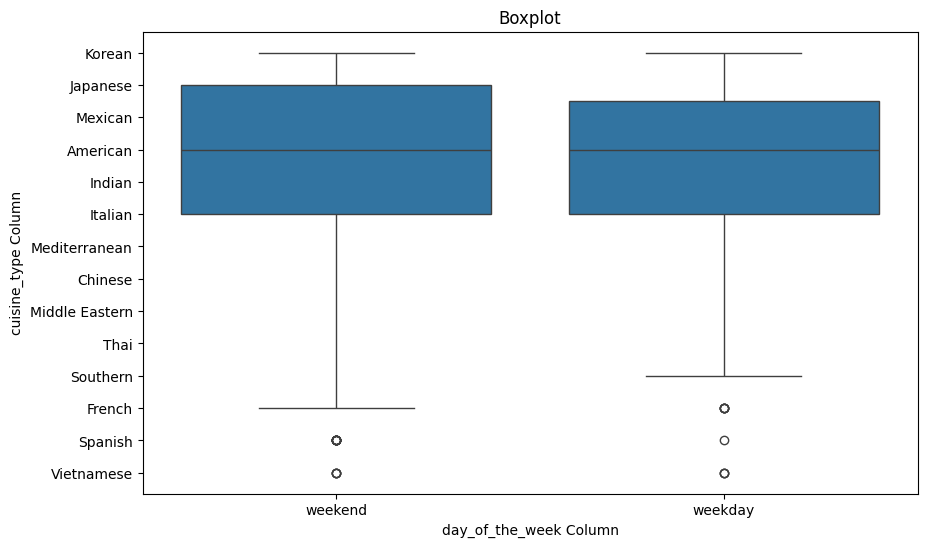

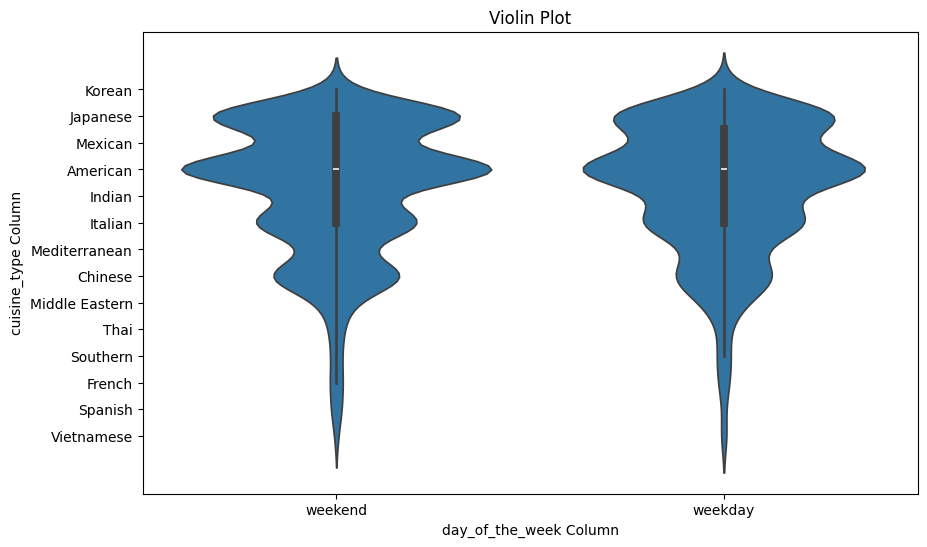

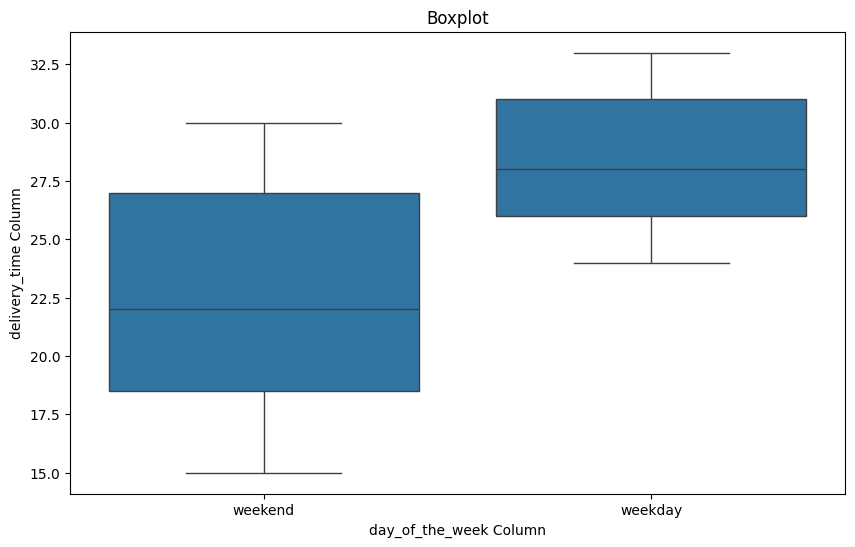

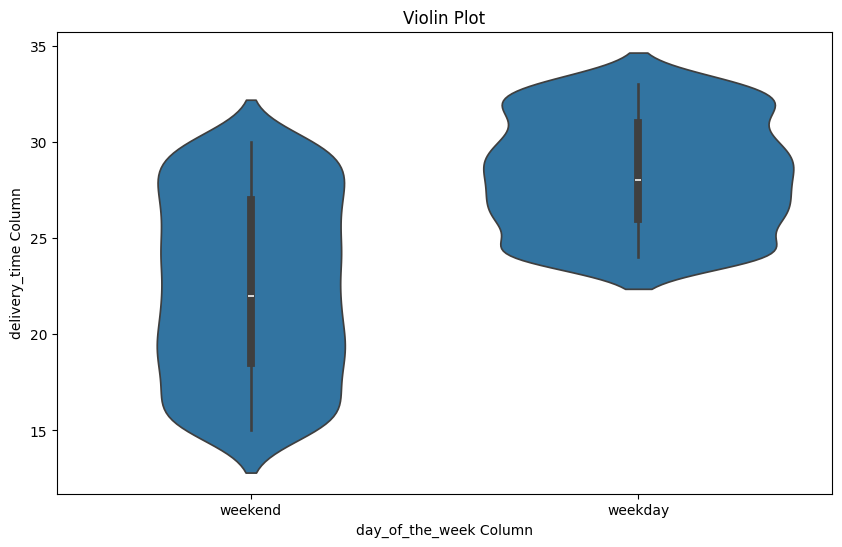

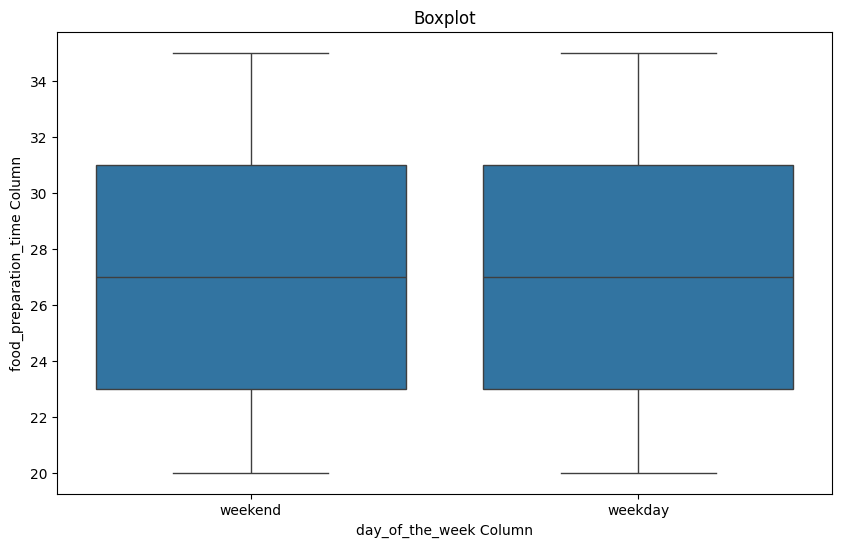

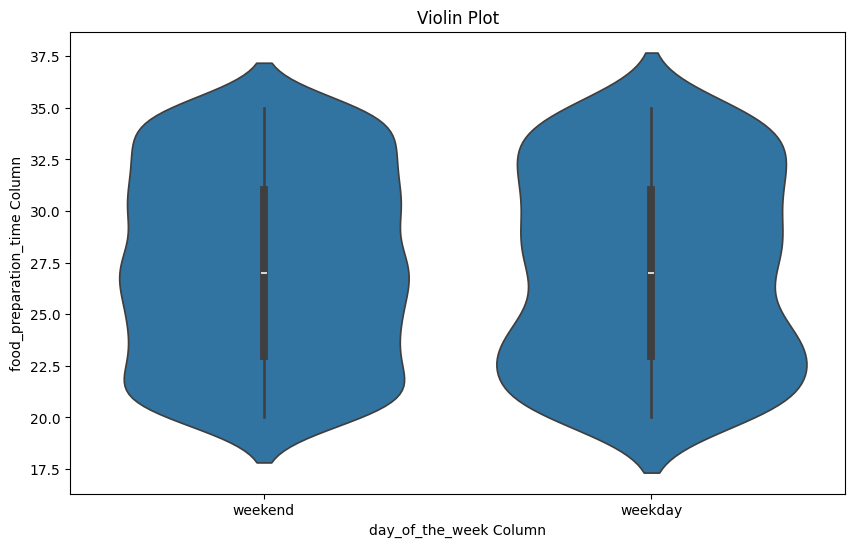

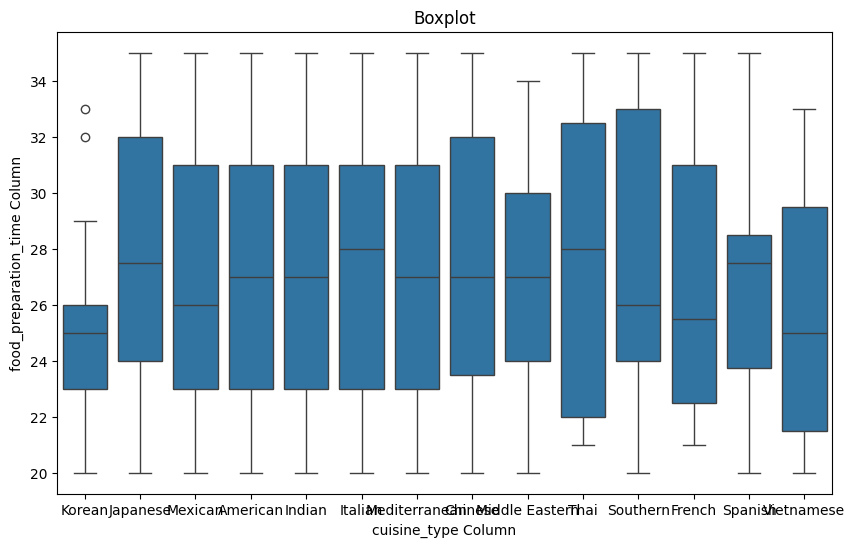

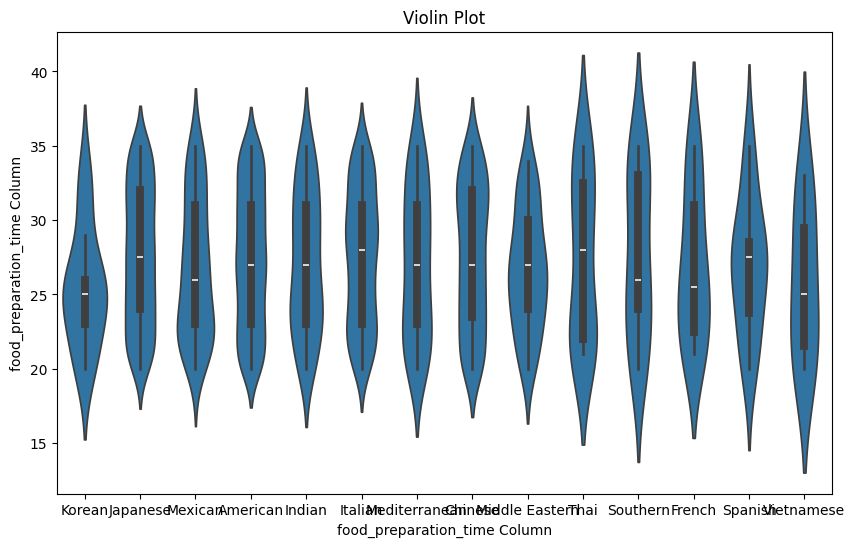

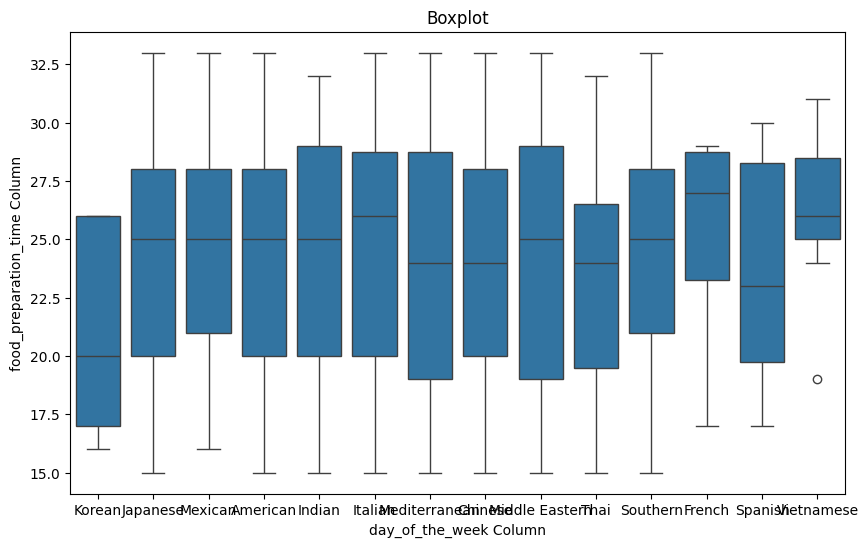

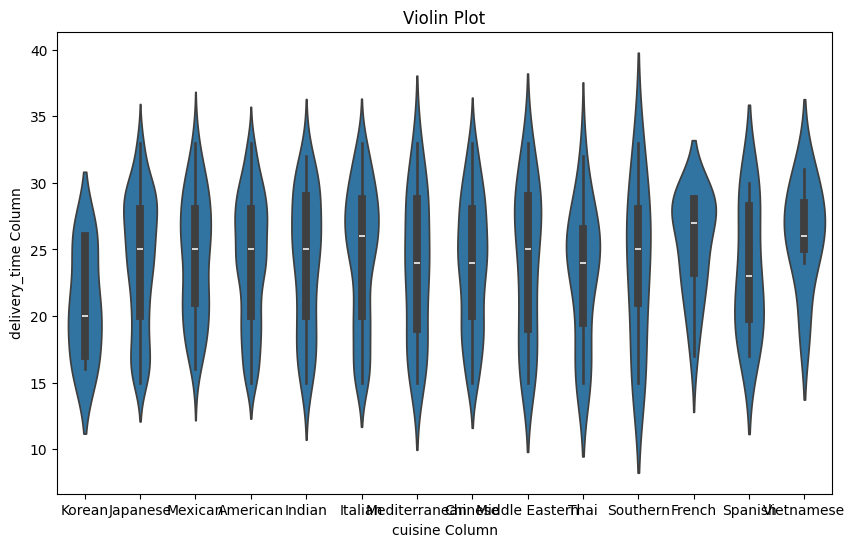

In [83]:
# Write the code here
# Select numerical variables
df.columns
numerical_vars = df.select_dtypes(include='number')

# Calculate correlation coefficients
correlation_matrix = numerical_vars.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='cuisine_type', data=df)
plt.title('Boxplot')
plt.xlabel('day_of_the_week Column')
plt.ylabel('cuisine_type Column')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_the_week', y='cuisine_type', data=df)
plt.title('Violin Plot')
plt.xlabel('day_of_the_week Column')
plt.ylabel('cuisine_type Column')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Boxplot')
plt.xlabel('day_of_the_week Column')
plt.ylabel('delivery_time Column')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Violin Plot')
plt.xlabel('day_of_the_week Column')
plt.ylabel('delivery_time Column')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Boxplot')
plt.xlabel('day_of_the_week Column')
plt.ylabel('food_preparation_time Column')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Violin Plot')
plt.xlabel('day_of_the_week Column')
plt.ylabel('food_preparation_time Column')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Boxplot')
plt.xlabel('cuisine_type Column')
plt.ylabel('food_preparation_time Column')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Violin Plot')
plt.xlabel('food_preparation_time Column')
plt.ylabel('food_preparation_time Column')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.title('Boxplot')
plt.xlabel('day_of_the_week Column')
plt.ylabel('food_preparation_time Column')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='cuisine_type', y='delivery_time', data=df)
plt.title('Violin Plot')
plt.xlabel('cuisine Column')
plt.ylabel('delivery_time Column')
plt.show()



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
# Write the code here



# Assuming df is your DataFrame

# Convert 'rating' column to numeric type, coerce non-convertible values to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'restaurant_name' and calculate rating count and average rating
grouped_custom_aggregation = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})

# Filter restaurants based on conditions
filtered_restaurants = grouped_custom_aggregation[(grouped_custom_aggregation[('rating', 'count')] > 50) &
                                                  (grouped_custom_aggregation[('rating', 'mean')].notnull()) &
                                                  (grouped_custom_aggregation[('rating', 'mean')] > 4)]

# Reset index to make 'restaurant_name' a regular column
filtered_restaurants.reset_index(inplace=True)

# Display filtered restaurants
print(filtered_restaurants)






             restaurant_name rating          
                              count      mean
0  Blue Ribbon Fried Chicken     64  4.328125
1          Blue Ribbon Sushi     73  4.219178
2                Shake Shack    133  4.278195
3          The Meatball Shop     84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [63]:
# Write the code here
var_25 = df[df['cost_of_the_order']>20.00]['cost_of_the_order'].sum()
revenue_25 = var_25 * 0.25
var_15 = df[(df['cost_of_the_order']>5.00) & (df['cost_of_the_order']<=20)]['cost_of_the_order'].sum()
revenue_15 = var_15 * 0.15
total_revenue = revenue_15 + revenue_25
print(total_revenue)

6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [84]:
# Write the code here
# Calculate the number of orders where food_preparation_time + delivery_time is greater than 60 minutes
orders_greater_than_60 = len(df[(df['food_preparation_time'] + df['delivery_time']) > 60])

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage of orders greater than 60 minutes
percentage_orders_greater_than_60 = (orders_greater_than_60 / total_orders) * 100

print(f"The percentage of orders where food_preparation_time + delivery_time > 60 minutes out of total orders is: {percentage_orders_greater_than_60:.2f}%")


# Group by cuisine type and calculate the number of orders where food_preparation_time + delivery_time is greater than 60 minutes
orders_greater_than_60_by_cuisine = df[df['food_preparation_time'] + df['delivery_time'] > 60].groupby('cuisine_type').size()

# Find the cuisine type with the maximum number of orders where the sum is greater than 60
cuisine_with_most_orders_greater_than_60 = orders_greater_than_60_by_cuisine.idxmax()

# Find the number of orders for the cuisine with the maximum count
max_orders_greater_than_60 = orders_greater_than_60_by_cuisine.max()

print(f"The cuisine type with the most orders where food_preparation_time + delivery_time > 60 minutes is '{cuisine_with_most_orders_greater_than_60}' with {max_orders_greater_than_60} orders.")



The percentage of orders where food_preparation_time + delivery_time > 60 minutes out of total orders is: 10.54%
The cuisine type with the most orders where food_preparation_time + delivery_time > 60 minutes is 'American' with 55 orders.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [80]:
# Write the code here
# Convert 'day_of_the_week' values to lowercase for consistency
df['day_of_the_week'] = df['day_of_the_week'].str.lower()

# Calculate the mean delivery time for weekdays
mean_delivery_orders_weekdays = df[df['day_of_the_week'] == "weekday"]['delivery_time'].mean()
print("Mean delivery time on weekdays:", mean_delivery_orders_weekdays)

# Calculate the mean delivery time for weekends
mean_delivery_orders_weekends = df[df['day_of_the_week'] == "weekend"]['delivery_time'].mean()
print("Mean delivery time on weekends:", mean_delivery_orders_weekends)


Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  It can be seen for the analysis that the Food delivery time on weekdays is higher compared to weekends; But the food preperations times during weekdays and weekends are same
* Its also seen that food preparation times across cusines is almost on the average , the food preparation is not causing any delay in delivering the orders.
*It is seen that Cusine Type of "American" receives more orders and more popular. Since the order volume is large for "American" relative to other cuisine types , it also takes more than 60 minutes to deliver the order in 55 instances.

### Recommendations:

*  Incorporate measures to improve the food delivery time on weekdays
* May be adding more staff for supporting "American" Cuisine might help too.

---